## Como afecta el tiempo de la partida.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
partidos  = pd.read_csv("match.csv")
partidos.head(20)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156
5,5,1446798766,1574,2047,4,3,63,113,22,True,0,0,155
6,6,1446800938,2124,1972,0,3,63,4,22,True,0,0,151
7,7,1446804030,2328,2046,0,0,63,255,22,True,0,0,138
8,8,1446819063,2002,0,1982,63,0,4,22,False,0,0,182
9,9,1446837251,2961,0,1972,63,0,85,22,False,0,0,133


In [4]:
partidos.describe()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,negative_votes,positive_votes,cluster
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,1.447573e+09,2476.453500,1000.016440,935.250060,34.529460,34.77526,93.825520,21.468000,0.015480,0.036820,142.304720
std,14433.901067,1.485270e+05,634.631261,948.211846,937.974714,29.209672,29.73214,92.648332,3.218258,0.364696,0.871068,25.156608
min,0.000000,1.446750e+09,59.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,111.000000
25%,12499.750000,1.447456e+09,2029.000000,0.000000,0.000000,0.000000,0.00000,9.000000,22.000000,0.000000,0.000000,123.000000
50%,24999.500000,1.447577e+09,2415.000000,1536.000000,384.000000,51.000000,51.00000,77.000000,22.000000,0.000000,0.000000,133.000000
75%,37499.250000,1.447700e+09,2872.000000,1974.000000,1972.000000,63.000000,63.00000,144.000000,22.000000,0.000000,0.000000,154.000000
max,49999.000000,1.447829e+09,16037.000000,2047.000000,2047.000000,63.000000,63.00000,831.000000,22.000000,47.000000,80.000000,242.000000


In [5]:
partidos_t=partidos[['match_id','duration','radiant_win']]

partidos_t.head()

,match_id,duration,radiant_win
0,0,2375,True
1,1,2582,False
2,2,2716,False
3,3,3085,False
4,4,1887,True


In [6]:
import seaborn as sns

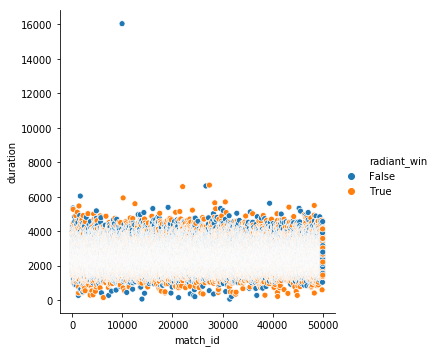

In [7]:
#fig, ax = plt.subplots()

sns.relplot(x="match_id", y="duration", hue="radiant_win",data=partidos_t);



In [8]:
win_radiant=partidos_t[partidos_t.radiant_win == True].count()
print(win_radiant)

match_id       25943
duration       25943
radiant_win    25943
dtype: int64


In [10]:
win_dire=partidos_t[partidos_t.radiant_win == False].count()
print(win_dire)

match_id       24057
duration       24057
radiant_win    24057
dtype: int64


In [12]:
print(win_radiant/(win_dire+win_radiant))

match_id       0.51886
duration       0.51886
radiant_win    0.51886
dtype: float64


In [13]:
# Tomando las partidas mas largas

partidas_largas=partidos_t[partidos_t['duration']>4000]
partidas_largas.head()

,match_id,duration,radiant_win
44,44,4348,True
80,80,4208,True
138,138,4295,False
144,144,5344,False
183,183,5267,True


In [15]:
win_radiant_largas=partidas_largas[partidas_largas.radiant_win == True].count()
print(win_radiant_largas)

match_id       434
duration       434
radiant_win    434
dtype: int64


In [16]:
win_dire_largas=partidas_largas[partidas_largas.radiant_win == False].count()
print(win_dire_largas)

match_id       426
duration       426
radiant_win    426
dtype: int64


In [17]:
print(win_radiant_largas/(win_radiant_largas+win_dire_largas))

match_id       0.504651
duration       0.504651
radiant_win    0.504651
dtype: float64


In [20]:
partidas_cortas=partidos_t[partidos_t['duration']<2000]
partidas_cortas=partidos_cortas[partidos_cortas['duration']>600]
partidas_cortas.head()

,match_id,duration,radiant_win
4,4,1887,True
5,5,1574,True
10,10,1562,True
14,14,1728,True
26,26,1499,True


In [21]:
win_radiant_cortas=partidas_cortas[partidas_cortas.radiant_win == True].count()
print(win_radiant_cortas)

match_id       6809
duration       6809
radiant_win    6809
dtype: int64


In [22]:
win_dire_cortas=partidas_cortas[partidas_cortas.radiant_win == False].count()
print(win_dire_cortas)

match_id       4714
duration       4714
radiant_win    4714
dtype: int64


In [23]:
print(win_radiant_cortas/(win_radiant_cortas+win_dire_cortas))

match_id       0.590905
duration       0.590905
radiant_win    0.590905
dtype: float64


In [26]:
partidas_medias=partidos_t[partidos_t['duration']<4000]
partidas_medias=partidas_medias[partidas_medias['duration']>2000]
partidas_medias.head()

,match_id,duration,radiant_win
0,0,2375,True
1,1,2582,False
2,2,2716,False
3,3,3085,False
6,6,2124,True


In [27]:
win_radiant_medias=partidas_medias[partidas_medias.radiant_win == True].count()
print(win_radiant_medias)

match_id       18683
duration       18683
radiant_win    18683
dtype: int64


In [28]:
win_dire_medias=partidas_medias[partidas_medias.radiant_win == False].count()
print(win_dire_medias)

match_id       18907
duration       18907
radiant_win    18907
dtype: int64


In [29]:
print(win_radiant_medias/(win_radiant_medias+win_dire_medias))

match_id       0.49702
duration       0.49702
radiant_win    0.49702
dtype: float64
